
<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [0]:
data = pd.read_csv('Advertising.csv')

In [26]:
data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Task 3: Relationship between Features and Response

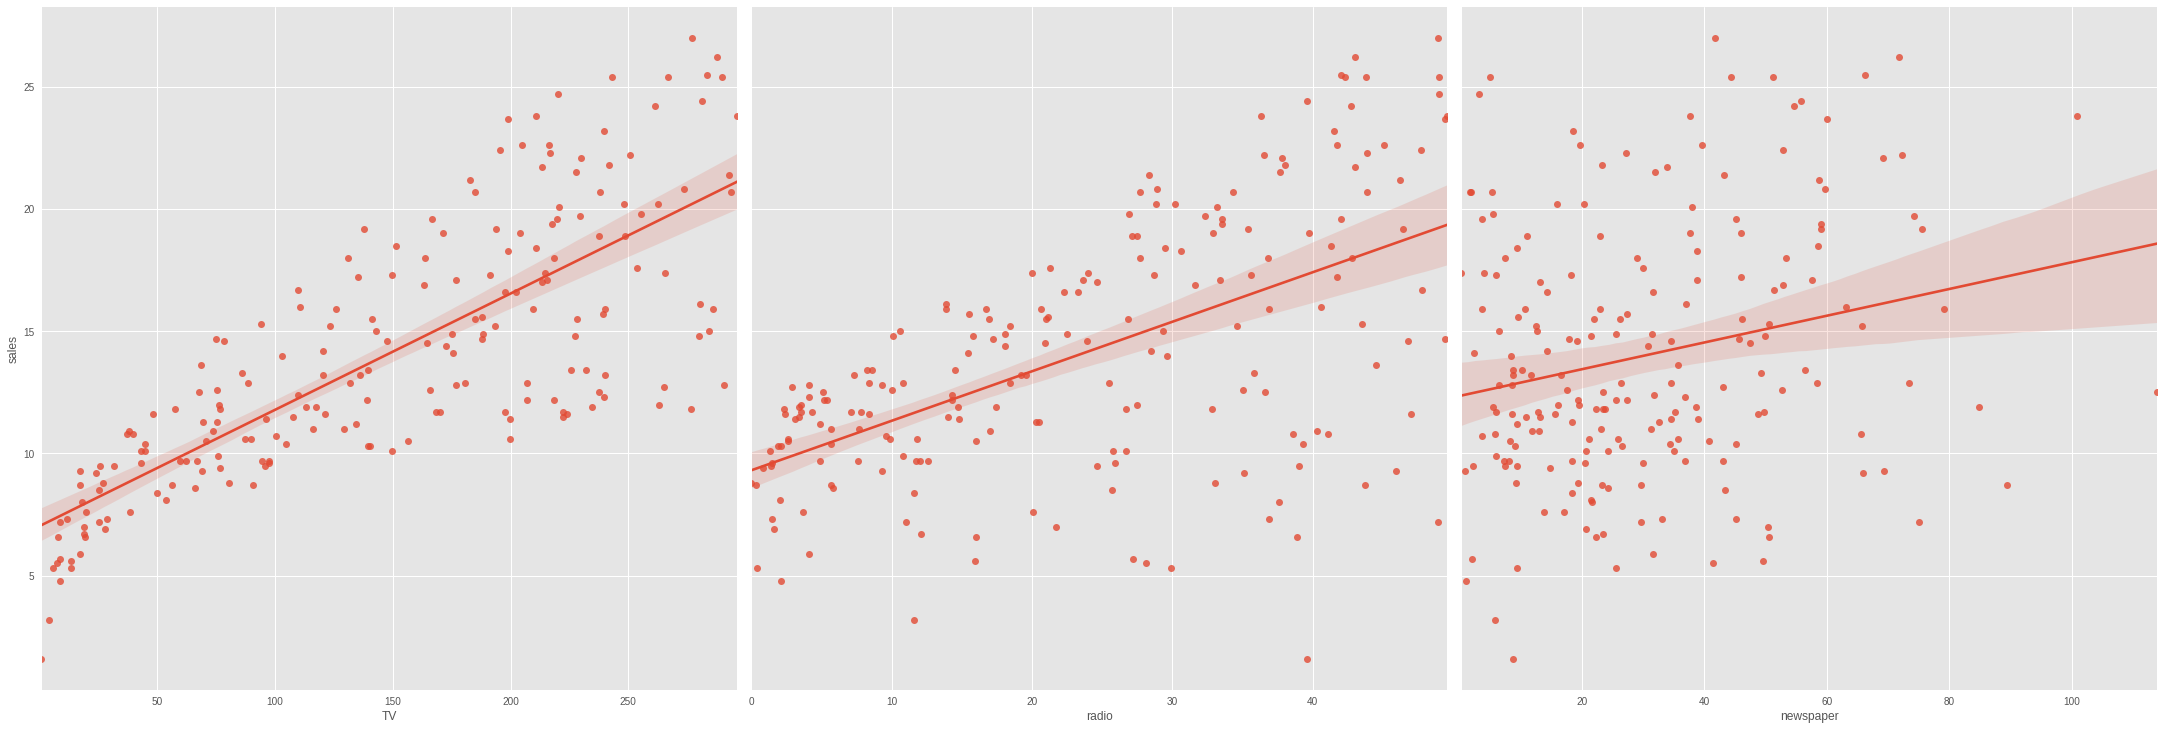

In [27]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales',height=10,kind='reg'  )

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [0]:
from sklearn.linear_model import LinearRegression

In [29]:
mlr = LinearRegression()
X = data[['TV','radio','newspaper']]
y = data['sales']
mlr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
mlr.coef_, mlr.intercept_

(array([ 0.04576465,  0.18853002, -0.00103749]), 2.938889369459412)

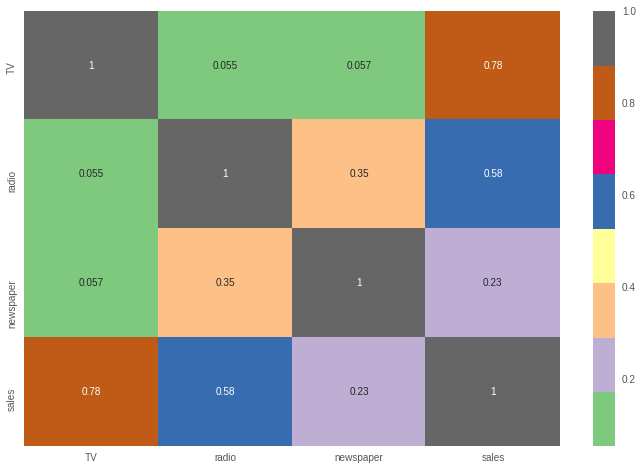

In [31]:
sns.heatmap(data.corr(), annot=True, cmap='Accent')

### Task 5: Feature Selection

In [32]:
from sklearn.metrics import r2_score
y_pred = mlr.predict(data[['TV','radio','newspaper']])
r2_score(data['sales'], y_pred)

0.8972106381789522

### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data[['TV','radio','newspaper']], data['sales'], train_size=0.7)

In [0]:
y_pred = mlr.predict(X_test)

In [36]:
# RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.5930774141589155

In [37]:
!pip install yellowbrick

In [0]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

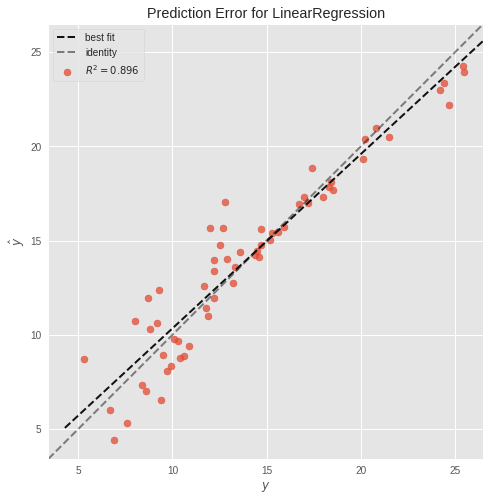

In [39]:
visualizer = PredictionError(mlr).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

### Task 7: Interaction Effect (Synergy)

In a multiple regression, is assumed that the effect on the target of increasing one unit of one predictor (is independent|has no influence) on the other predictor.

If this is not the case, sharing a value on two predictors, may have more effect than allocating the entire value to only one.



In [49]:
data['synergy'] = data.TV * data.newspaper
X_train, X_test, y_train, y_test = train_test_split(data[['TV','radio','newspaper','synergy']], data['sales'], train_size=0.7, random_state=101)
mlr2 = LinearRegression()
mlr2.fit(X_train, y_train)
y_pred2 = mlr2.predict(X_test)
r2_score(y_test, y_pred2)

0.9225364589383712

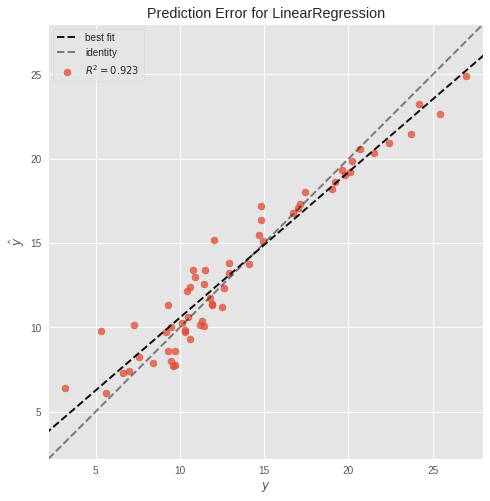

In [50]:
visualizer = PredictionError(mlr2).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()